In [2]:
import pynamical
from pynamical import simulate, bifurcation_plot, save_fig
import pandas as pd, numpy as np, IPython.display as display, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline



In [3]:

title_font = pynamical.get_title_font()
label_font = pynamical.get_label_font()

In [5]:


# run the logistic model for 20 generations for 7 growth rates between 0.5 and 3.5 then view the output
pops = simulate(num_gens=20, rate_min=1.5, rate_max=3.5, num_rates=7)
pops.applymap(lambda x: '{:03.3f}'.format(x))



,1.5,1.83333333333,2.16666666667,2.5,2.83333333333,3.16666666667,3.5
0,0.500,0.500,0.500,0.500,0.500,0.500,0.500
1,0.375,0.458,0.542,0.625,0.708,0.792,0.875
2,0.352,0.455,0.538,0.586,0.585,0.522,0.383
3,0.342,0.455,0.539,0.607,0.688,0.790,0.827
4,0.338,0.455,0.538,0.597,0.609,0.525,0.501
5,0.335,0.455,0.538,0.602,0.675,0.790,0.875
6,0.334,0.455,0.538,0.599,0.622,0.526,0.383
7,0.334,0.455,0.538,0.600,0.666,0.790,0.827
8,0.334,0.455,0.538,0.600,0.630,0.526,0.501
9,0.333,0.455,0.538,0.600,0.661,0.789,0.875


In [6]:
def get_colors(cmap, n, start=0., stop=1., alpha=1., reverse=False):
    '''return n-length list of rgba colors from the passed colormap name and alpha,
       limit extent by start/stop values and reverse list order if flag is true'''
    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, alpha) for r, g, b, _ in colors]
    return list(reversed(colors)) if reverse else colors

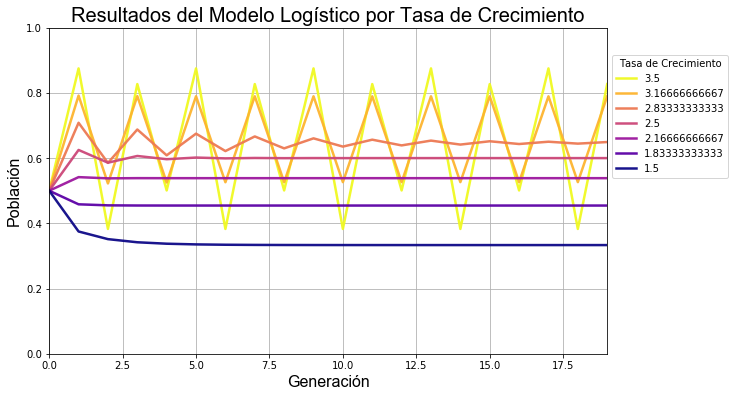

In [13]:


# plot the results of the logistic map run for these 7 different growth rates
#color_list = ['#cc8033', '#80cc33', 'b', '#33cccc', '#3333cc', '#ff9900', '#ff0000']
color_list = get_colors('plasma', n=len(pops.columns), start=0., stop=1)
for color, rate in reversed(list(zip(color_list, pops.columns))):
    ax = pops[rate].plot(kind='line', figsize=[10, 6], linewidth=2.5, alpha=0.95, c=color)
ax.grid(True)
ax.set_ylim([0, 1])
ax.legend(title='Tasa de Crecimiento', loc=3, bbox_to_anchor=(1, 0.525))
ax.set_title('Resultados del Modelo Logístico por Tasa de Crecimiento', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)

save_fig('logistic-map-growth-rates')
plt.show()



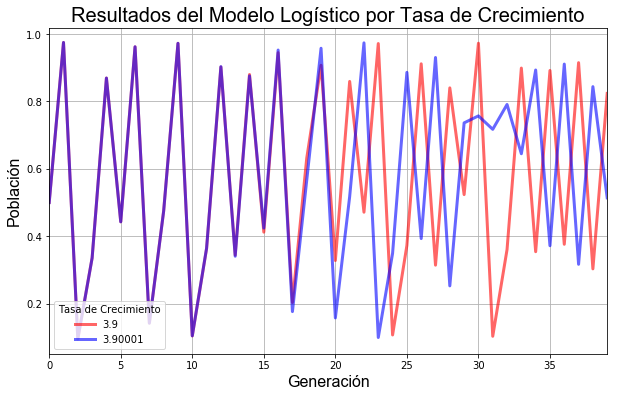

In [18]:
# plot the numeric output of the logistic model for growth rates of 3.9 and 3.90001
# this demonstrates sensitive dependence on the parameter
rate1 = 3.9
rate2 = rate1 + 0.00001

pops = simulate(num_gens=40, rate_min=rate1, rate_max=rate2, num_rates=2)
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['r','b'])
ax.grid(True)
ax.set_title('Resultados del Modelo Logístico por Tasa de Crecimiento', fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Tasa de Crecimiento', loc=3)

save_fig('logistic-map-parameter-sensitivity')
plt.show()

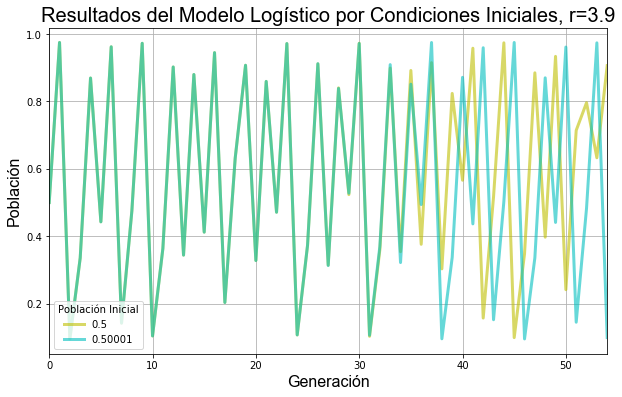

In [29]:


# plot the numeric output of the logistic model at growth rate 3.9 for 2 similar starting population values
# this demonstrates sensitive dependence on initial conditions, as they diverge through chaos
r = 3.9
pops1 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, rate_max=4.0, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['y','c'])
ax.grid(True)
ax.set_title('Resultados del Modelo Logístico por Condiciones Iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Población', fontproperties=label_font)
ax.legend(title='Población Inicial', loc=3)

save_fig('logistic-map-initial-conditions')
plt.show()



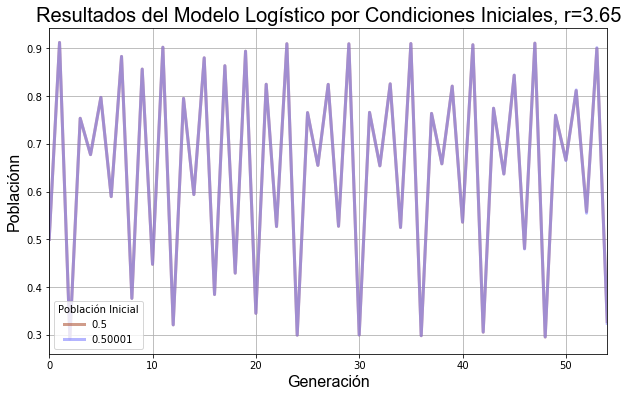

In [30]:
# plot the numeric output of the logistic model at growth rate 3.65 for 2 similar starting population values
# this demonstrates how very similar conditions do not diverge when the rate is not chaotic
r = 3.65
pops1 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.5)
pops2 = simulate(num_gens=55, rate_min=r, num_rates=1, initial_pop=0.50001)
pops = pd.concat([pops1, pops2], axis=1)
pops.columns = ['0.5', '0.50001']
ax = pops.plot(kind='line', figsize=[10, 6], linewidth=3, alpha=0.6, style=['#b25a3d','#8284ff'])
ax.grid(True)
ax.set_title('Resultados del Modelo Logístico por Condiciones Iniciales, r={}'.format(r), fontproperties=title_font)
ax.set_xlabel('Generación', fontproperties=label_font)
ax.set_ylabel('Poblaciónn', fontproperties=label_font)
ax.legend(title='Población Inicial', loc=3)

save_fig('logistic-map-initial-conditions-stable')
plt.show()